In [277]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import sportypy as sp


In [278]:
bb = pd.read_csv('baseballcomplete copy.csv')

In [279]:
bb[['year','month','day']] = bb['game_date'].str.split('-', expand= True)
bb.drop(columns = ['game_date','year'], inplace = True)

In [280]:
bb['p_side_adv'] = bb['stand'] == bb['p_throws']
bb['on_base'] = bb.events.isin(['walk','single','double','triple','home_run']).mask(bb['events'].isna(), np.nan)
bb['in_box'] = bb.zone.isin([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0])
bb['is_strike'] = bb.description.isin(['swinging_strike','called_strike'])

In [281]:
for column in bb.columns:
    print(column, bb[column].isna().sum())

pitch_type 285
release_speed 287
release_pos_x 286
release_pos_z 286
player_name 0
batter 0
pitcher 0
events 521427
description 0
spin_dir 701557
spin_rate_deprecated 701557
break_angle_deprecated 701557
break_length_deprecated 701557
zone 286
des 0
game_type 0
stand 0
p_throws 0
home_team 0
away_team 0
type 0
hit_location 543493
bb_type 578735
balls 0
strikes 0
game_year 0
pfx_x 286
pfx_z 286
plate_x 286
plate_z 286
on_3b 636718
on_2b 571193
on_1b 489108
outs_when_up 0
inning 0
inning_topbot 0
hc_x 578782
hc_y 578782
tfs_deprecated 701557
tfs_zulu_deprecated 701557
umpire 701557
sv_id 701557
vx0 286
vy0 286
vz0 286
ax 286
ay 286
az 286
sz_top 286
sz_bot 286
hit_distance_sc 465004
launch_speed 466527
launch_angle 466218
effective_speed 1217
release_spin_rate 3265
release_extension 1046
game_pk 0
fielder_2 0
fielder_3 0
fielder_4 0
fielder_5 0
fielder_6 0
fielder_7 0
fielder_8 0
fielder_9 0
release_pos_y 286
estimated_ba_using_speedangle 579110
estimated_woba_using_speedangle 522664
wob

In [282]:
bb.description.value_counts()

description
ball                       233158
foul                       127335
hit_into_play              122828
called_strike              114863
swinging_strike             73904
blocked_ball                14841
foul_tip                     7240
swinging_strike_blocked      3897
hit_by_pitch                 1994
foul_bunt                    1234
missed_bunt                   196
pitchout                       51
bunt_foul_tip                  16
Name: count, dtype: int64

In [283]:
bb.drop(columns = ['spin_dir','spin_rate_deprecated','break_angle_deprecated','break_length_deprecated','tfs_deprecated','tfs_zulu_deprecated','umpire','sv_id'])

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,...,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,month,day,p_side_adv,on_base,in_box,is_strike
0,FF,95.0,-2.01,5.22,"Rocchio, Brayan",677587,622491,single,hit_into_play,3.0,...,1.32,0.85,-0.85,19.4,04,02,False,True,True,False
1,CH,88.5,-2.09,4.95,"Rocchio, Brayan",677587,622491,NaN,foul,4.0,...,2.82,1.40,-1.40,14.4,04,02,False,NaN,True,False
2,SI,95.0,-2.02,5.12,"Rocchio, Brayan",677587,622491,NaN,called_strike,2.0,...,2.37,1.48,-1.48,21.9,04,02,False,NaN,True,True
3,KC,80.8,-3.13,5.61,"Rizzo, Anthony",519203,668678,field_out,hit_into_play,13.0,...,4.61,-0.50,0.50,36.3,04,02,False,False,False,False
4,FF,95.4,-1.95,5.12,"Hedges, Austin",595978,622491,strikeout,foul_tip,5.0,...,1.59,1.08,1.08,17.5,04,02,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701552,FF,95.6,-2.76,6.15,"Ohtani, Shohei",660271,543037,field_out,hit_into_play,5.0,...,1.00,0.69,-0.69,41.8,10,30,False,False,True,False
701553,SI,96.0,-0.72,6.67,"Hernández, Teoscar",606192,605280,NaN,ball,13.0,...,2.16,1.62,1.62,49.4,10,30,True,NaN,False,False
701554,FF,95.8,-1.55,5.85,"Lux, Gavin",666158,596133,NaN,ball,11.0,...,0.75,0.37,-0.37,49.2,10,30,False,NaN,False,False
701555,SL,85.9,2.78,5.53,"Torres, Gleyber",650402,607455,NaN,swinging_strike,13.0,...,4.06,-0.70,0.70,31.3,10,30,False,NaN,False,True


In [284]:
bb = bb.sort_values(by=['month','day','game_pk','at_bat_number','pitch_number'], ascending= [True,True,False,True,True])

In [285]:
third_time = bb[bb['n_thruorder_pitcher'] == 3]
starters = third_time.pitcher.unique()
len(starters)
starters_frame = bb[bb['pitcher'].isin(starters)]

In [286]:
pitch_counts = bb.groupby(['pitcher', 'pitch_type']).size().reset_index(name='pitch_count')
pitcher_fav_pitch = pitch_counts.loc[pitch_counts.groupby('pitcher')['pitch_count'].idxmax()]
pitcher_fav_pitch = pitcher_fav_pitch[['pitcher', 'pitch_type']].rename(columns={'pitch_type': 'pitcher_fav_pitch'})
bb = bb.merge(pitcher_fav_pitch, on='pitcher', how='left')

things to remember: 
- we can use top/bottom of inning variable to determine if pitcher is home or away to see if home field advantage plays a role
- pitch velo
- arm angle
- pitch count
- n thru order
- pitcher days since last game
- handedness matchups (stand and p_throws?)
- release positions maybe?

add columns
- pitch variety? average different number of pitches for each time through the order
- fav pitch & proportion of pitches that are fav pitch

groups:
- group by favorite pitch
- proportion of pitches that are favorite pitches (binned at a certain interval.)

In [287]:
first = bb[(bb['pitcher'].isin(starters)) & (bb['n_thruorder_pitcher'] == 1)]
second = bb[(bb['pitcher'].isin(starters)) & (bb['n_thruorder_pitcher'] == 2)]
third = bb[(bb['pitcher'].isin(starters)) & (bb['n_thruorder_pitcher'] == 3)]

In [288]:
third

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,...,api_break_x_arm,api_break_x_batter_in,arm_angle,month,day,p_side_adv,on_base,in_box,is_strike,pitcher_fav_pitch
130,FC,86.4,1.28,5.63,"Marte, Ketel",606466,641482,force_out,hit_into_play,NaN,...,-0.47,0.47,43.0,04,02,False,False,True,False,FF
131,FF,91.2,0.88,5.82,"Alexander, Blaze",677942,641482,NaN,ball,NaN,...,0.38,-0.38,50.0,04,02,False,NaN,False,False,FF
132,FC,86.0,1.28,5.61,"Alexander, Blaze",677942,641482,NaN,foul,NaN,...,-0.50,0.50,47.1,04,02,False,NaN,True,False,FF
133,FF,90.1,0.84,5.76,"Alexander, Blaze",677942,641482,NaN,foul,NaN,...,0.18,-0.18,50.0,04,02,False,NaN,True,False,FF
134,FC,87.7,1.00,5.75,"Alexander, Blaze",677942,641482,strikeout,swinging_strike,NaN,...,-0.36,0.36,48.4,04,02,False,False,True,True,FF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701412,FC,92.8,-2.66,5.94,"Smith, Will",669257,543037,NaN,foul,NaN,...,0.11,0.11,41.0,10,30,True,NaN,True,False,FF
701413,FF,97.0,-2.58,6.01,"Smith, Will",669257,543037,strikeout,swinging_strike,NaN,...,0.52,0.52,42.9,10,30,True,False,True,True,FF
701414,KC,83.2,-2.64,6.10,"Lux, Gavin",666158,543037,NaN,foul,NaN,...,-0.73,0.73,47.6,10,30,False,NaN,True,False,FF
701415,FF,97.8,-2.79,5.88,"Lux, Gavin",666158,543037,NaN,foul,NaN,...,0.62,-0.62,42.2,10,30,False,NaN,True,False,FF


In [289]:
def compute_variety_score(group):
    """Compute pitch variety score within each game for each pitcher."""
    # Get cumulative counts for each pitch type
    pitch_counts = group['pitch_type'].value_counts(normalize=True)
    
    # Total pitches thrown at each point
    total_pitches = pitch_counts.sum()
    
    # Unique pitch types thrown
    unique_pitches = (pitch_counts > 0).sum()
    
    # Compute proportions (avoid division by zero)
    proportions = pitch_counts.div(total_pitches, axis=0)
    
    # Compute product of proportions
    product_proportions = proportions.prod()  
    # Apply the formula, ensuring log(0) is handled properly
    variety_score = np.log10(unique_pitches / product_proportions)
    
    return variety_score


In [290]:
first_variety = first.groupby('pitcher').apply(compute_variety_score).reset_index(name='pitch_variety')
first = first.merge(first_variety, on='pitcher', how='left')
second_variety = second.groupby('pitcher').apply(compute_variety_score).reset_index(name='pitch_variety')
second = second.merge(second_variety, on='pitcher', how='left')
third_variety = third.groupby('pitcher').apply(compute_variety_score).reset_index(name='pitch_variety')
third = third.merge(third_variety, on='pitcher', how='left')

/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/1898480263.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/1898480263.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/1898480263.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns.

In [291]:
def compute_pmv(group):
    """
    Compute Pitch Mix Variance (PMV) for each pitcher over the entire season.
    PMV = 1 - (SD(pitch proportions) + (max(pitch proportions) / number of unique pitch types))
    """
    # Count occurrences of each pitch type
    pitch_counts = group['pitch_type'].value_counts(normalize=True)  # Get proportions directly
    
    # Compute standard deviation of pitch proportions
    sd_proportions = pitch_counts.std()
    
    # Compute maximum proportion
    max_proportion = pitch_counts.max()
    
    # Compute number of unique pitch types
    unique_pitches = pitch_counts.count()
    
    # Compute PMV
    pmv = 1 - (sd_proportions + (max_proportion / unique_pitches))
    
    return pmv


In [292]:
first_pmv = first.groupby('pitcher').apply(compute_pmv).reset_index(name='pmv')
first = first.merge(first_pmv, on='pitcher', how='left')
second_pmv = second.groupby('pitcher').apply(compute_pmv).reset_index(name='pmv')
second = second.merge(second_pmv, on='pitcher', how='left')
third_pmv = third.groupby('pitcher').apply(compute_pmv).reset_index(name='pmv')
third = third.merge(third_pmv, on='pitcher', how='left')

/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/589340247.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/589340247.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/589340247.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. Th

In [293]:
first['obp'] = first.groupby('pitcher')['on_base'].transform('mean').astype('float64')
second['obp'] = second.groupby('pitcher')['on_base'].transform('mean').astype('float64')
third['obp'] = third.groupby('pitcher')['on_base'].transform('mean').astype('float64')

In [294]:
first

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,...,month,day,p_side_adv,on_base,in_box,is_strike,pitcher_fav_pitch,pitch_variety,pmv,obp
0,FF,91.7,-3.09,5.82,"Torres, Gleyber",650402,668678,NaN,ball,NaN,...,04,02,True,NaN,False,False,FF,7.830442,0.741596,0.331915
1,FF,92.5,-2.81,5.88,"Torres, Gleyber",650402,668678,NaN,ball,NaN,...,04,02,True,NaN,False,False,FF,7.830442,0.741596,0.331915
2,FF,91.6,-2.96,5.89,"Torres, Gleyber",650402,668678,NaN,ball,NaN,...,04,02,True,NaN,False,False,FF,7.830442,0.741596,0.331915
3,FF,92.4,-3.03,5.88,"Torres, Gleyber",650402,668678,NaN,called_strike,NaN,...,04,02,True,NaN,False,True,FF,7.830442,0.741596,0.331915
4,FF,92.7,-2.97,5.86,"Torres, Gleyber",650402,668678,NaN,called_strike,NaN,...,04,02,True,NaN,False,True,FF,7.830442,0.741596,0.331915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192922,KC,77.4,-1.23,5.78,"Wells, Austin",669224,621111,strikeout,swinging_strike,NaN,...,10,30,False,False,True,True,FF,8.082055,0.838032,0.367816
192923,KC,78.5,-1.19,5.70,"Verdugo, Alex",657077,621111,NaN,ball,NaN,...,10,30,False,NaN,False,False,FF,8.082055,0.838032,0.367816
192924,FC,93.1,-1.19,5.53,"Verdugo, Alex",657077,621111,NaN,swinging_strike,NaN,...,10,30,False,NaN,False,True,FF,8.082055,0.838032,0.367816
192925,KC,78.7,-1.01,5.73,"Verdugo, Alex",657077,621111,NaN,swinging_strike,NaN,...,10,30,False,NaN,False,True,FF,8.082055,0.838032,0.367816


SEPARATE INTO 3 DATAFRAMES FOR EACH TIME THEROUGH THE ORDER
weighted release speeds for different kinds of pitches and unweighted
fav pitch type overall and fav pitch type for each time through the order
proportion of use for favorite pitch type overall and each time through the order
average exit velo (maybe later into the game, hitters are getting better contact).
percent of pitches in the box for each time through the order?
maybe add chase %?

In [295]:
bb.zone.value_counts()

zone
14.0    131819
13.0     86522
11.0     75921
12.0     59179
5.0      52526
8.0      44754
6.0      42757
4.0      41547
9.0      39908
2.0      35861
7.0      33400
1.0      29874
3.0      27203
Name: count, dtype: int64

In [296]:
first['avg_rel_speed'] = first.groupby('pitcher')['release_speed'].transform('mean')
second['avg_rel_speed'] = second.groupby('pitcher')['release_speed'].transform('mean')
third['avg_rel_speed'] = third.groupby('pitcher')['release_speed'].transform('mean')

In [297]:
def weighted_rel_speed(group):
    pitch_counts = group['pitch_type'].value_counts(normalize=True)
    avg_speeds = group.groupby('pitch_type')['release_speed'].mean()
    weighted_speed = (pitch_counts * avg_speeds).sum()

    return weighted_speed



In [298]:
first_weigh = first.groupby('pitcher').apply(weighted_rel_speed).reset_index(name='weighed_avg_speed')
first = first.merge(first_weigh, on='pitcher', how='left')
second_weigh = second.groupby('pitcher').apply(weighted_rel_speed).reset_index(name='weighed_avg_speed')
second = second.merge(second_weigh, on='pitcher', how='left')
third_weigh = third.groupby('pitcher').apply(weighted_rel_speed).reset_index(name='weighed_avg_speed')
third = third.merge(third_weigh, on='pitcher', how='left')

/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/2961861533.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/2961861533.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/2961861533.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns.

In [299]:
def compute_max_pitch_proportion(group):
    # Get pitch type proportions
    pitch_proportions = group['pitch_type'].value_counts(normalize=True)
    
    # Get most common pitch type (pitch with max proportion)
    max_pitch_type = pitch_proportions.idxmax()
    
    # Get the proportion of that pitch type
    max_pitch_prop = pitch_proportions.max()
    
    return pd.Series({'fav_pitch_order': max_pitch_type, 'fav_pitch_prop_order': max_pitch_prop})

In [300]:
first_max = first.groupby('pitcher').apply(compute_max_pitch_proportion).reset_index()
second_max = second.groupby('pitcher').apply(compute_max_pitch_proportion).reset_index()
third_max = third.groupby('pitcher').apply(compute_max_pitch_proportion).reset_index()
first = first.merge(first_max, on = 'pitcher', how = 'left')
second = second.merge(second_max, on = 'pitcher', how = 'left')
third = third.merge(third_max, on = 'pitcher', how = 'left')

/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/1063555386.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/1063555386.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/z5/wycf3x413tdfj2x82rdw6yfh0000gn/T/ipykernel_51289/1063555386.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns.

In [301]:
first['in_zone_perc'] = first.groupby('pitcher')['in_box'].mean()
second['in_zone_perc'] = second.groupby('pitcher')['in_box'].mean()
third['in_zone_perc'] = third.groupby('pitcher')['in_box'].mean()

In [302]:
first['strike_perc'] = first.groupby('pitcher')['is_strike'].mean()
second['strike_perc'] = second.groupby('pitcher')['is_strike'].mean()
third['strike_perc'] = third.groupby('pitcher')['is_strike'].mean()

In [303]:
first_agg = first.groupby("pitcher", as_index=False).agg(
    {col: "mean" if first[col].dtype.kind in "biufc" else "first" for col in first.columns}
)
second_agg = second.groupby("pitcher", as_index=False).agg(
    {col: "mean" if second[col].dtype.kind in "biufc" else "first" for col in second.columns}
)
third_agg = third.groupby("pitcher", as_index=False).agg(
    {col: "mean" if third[col].dtype.kind in "biufc" else "first" for col in third.columns}
)


'release_pos_x',
'release_pos_z',
'player_name',
'pitcher',
'plate_x',
'plate_z',
'release_pos_y',
'estimated_ba_using_speedangle',
'estimated_woba_using_speedangle',
'woba_value',
'woba_denom',
'babip_value',
'iso_value',
'arm_angle',
'age_pit',
'p_side_adv',
'on_base',
'in_box',
'is_strike',
'pitcher_fav_pitch',
'pitch_variety',
'pmv',
'obp',
'avg_rel_speed',
'weighed_avg_speed','fav_pitch_order',
'fav_pitch_prop_order',
'in_zone_perc',
'strike_perc'

In [304]:
first_agg = first_agg[['release_pos_x','release_pos_z','pitcher','plate_x','plate_z', 'release_pos_y','iso_value','arm_angle','age_pit','p_side_adv','in_box','is_strike','pitcher_fav_pitch','pitch_variety','pmv','obp','avg_rel_speed','weighed_avg_speed','fav_pitch_order','fav_pitch_prop_order']]
second_agg = second_agg[['release_pos_x','release_pos_z','pitcher','plate_x','plate_z', 'release_pos_y','iso_value','arm_angle','age_pit','p_side_adv','in_box','is_strike','pitcher_fav_pitch','pitch_variety','pmv','obp','avg_rel_speed','weighed_avg_speed','fav_pitch_order','fav_pitch_prop_order']]
third_agg = third_agg[['release_pos_x','release_pos_z','pitcher','plate_x','plate_z', 'release_pos_y','iso_value','arm_angle','age_pit','p_side_adv','in_box','is_strike','pitcher_fav_pitch','pitch_variety','pmv','obp','avg_rel_speed','weighed_avg_speed','fav_pitch_order','fav_pitch_prop_order']]
first_agg.set_index('pitcher')
second_agg.set_index('pitcher')
third_agg.set_index('pitcher')

,release_pos_x,release_pos_z,plate_x,plate_z,release_pos_y,iso_value,arm_angle,age_pit,p_side_adv,in_box,is_strike,pitcher_fav_pitch,pitch_variety,pmv,obp,avg_rel_speed,weighed_avg_speed,fav_pitch_order,fav_pitch_prop_order
pitcher,,,,,,,,,,,,,,,,,,,
434378.0,-1.544139,7.074924,0.087885,2.583142,54.540000,0.213483,55.007553,41.0,0.489426,0.513595,0.244713,FF,3.320330,0.690579,0.292135,87.625076,87.625076,FF,0.510574
450203.0,-2.548677,5.410653,0.019083,2.119171,54.309083,0.102564,20.618166,41.0,0.455026,0.486772,0.278660,CU,4.714573,0.748830,0.288462,86.452734,86.452734,CU,0.456790
453286.0,-3.130920,5.461839,0.250115,2.269195,54.178736,0.173913,29.151724,40.0,0.655172,0.471264,0.264368,FF,4.599116,0.795735,0.217391,86.302299,86.302299,FF,0.367816
456501.0,-2.007736,5.421887,0.183396,2.240000,54.755472,0.769231,32.366038,38.0,0.433962,0.490566,0.226415,SI,3.476735,0.682474,0.461538,87.713208,87.713208,SI,0.509434
458681.0,-3.133424,5.526355,-0.016256,2.372709,54.065074,0.153061,31.739655,37.0,0.445813,0.433498,0.224138,FF,6.146048,0.826453,0.367347,89.111330,89.111330,FF,0.342365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800049.0,-0.615955,6.083371,-0.270674,2.483483,54.511461,0.428571,50.319101,23.0,0.269663,0.494382,0.191011,FF,4.894163,0.802870,0.476190,88.149438,88.149438,SL,0.348315
805673.0,-2.032857,5.948929,0.241250,2.252321,54.025536,0.058824,42.237500,24.0,0.500000,0.500000,0.267857,FF,3.609835,0.721751,0.352941,90.030357,90.030357,SL,0.410714
806185.0,-1.186115,6.330318,0.101083,2.461592,53.989299,0.125000,41.447771,23.0,0.222930,0.445860,0.254777,FF,3.217424,0.742409,0.343750,89.297452,89.297452,FF,0.452229


In [305]:
for column in first_agg.columns:
    print(column)

release_pos_x
release_pos_z
pitcher
plate_x
plate_z
release_pos_y
iso_value
arm_angle
age_pit
p_side_adv
in_box
is_strike
pitcher_fav_pitch
pitch_variety
pmv
obp
avg_rel_speed
weighed_avg_speed
fav_pitch_order
fav_pitch_prop_order


In [306]:
import matplotlib.pyplot as plt
third_agg.in_box

0      0.513595
1      0.486772
2      0.471264
3      0.490566
4      0.433498
         ...   
299    0.494382
300    0.500000
301    0.445860
302    0.525735
303    0.666667
Name: in_box, Length: 304, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


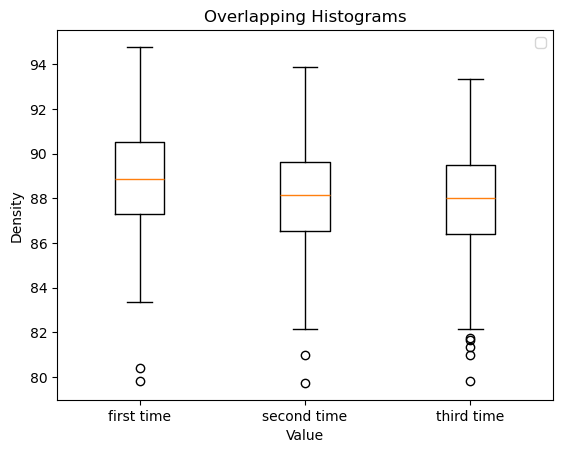

In [307]:
plt.boxplot([first_agg.weighed_avg_speed,second_agg.weighed_avg_speed, third_agg.weighed_avg_speed], labels = ['first time','second time','third time'])
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Overlapping Histograms")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


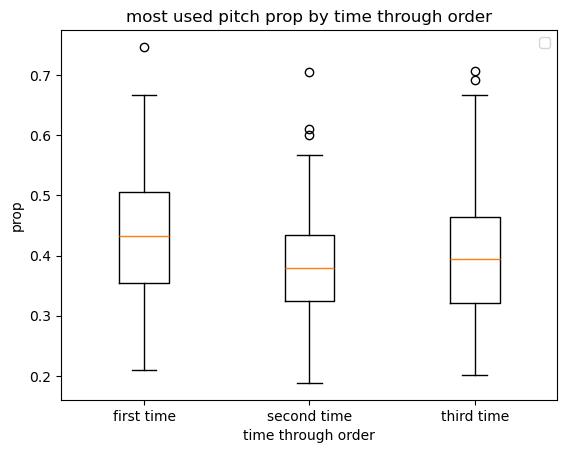

In [308]:
plt.boxplot([first_agg.fav_pitch_prop_order,second_agg.fav_pitch_prop_order, third_agg.fav_pitch_prop_order], labels = ['first time','second time','third time'])
plt.legend()
plt.xlabel("time through order")
plt.ylabel("prop")
plt.title("most used pitch prop by time through order")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


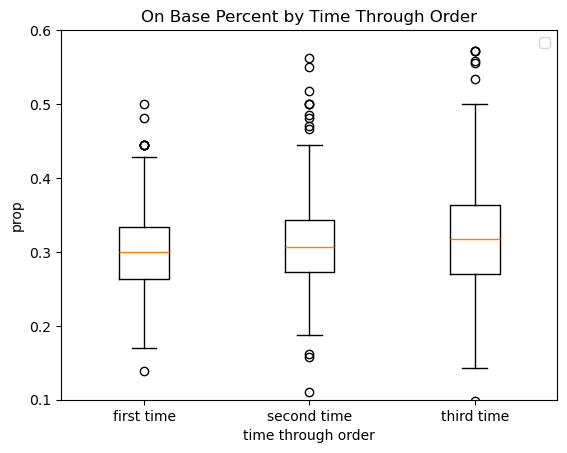

In [309]:
plt.boxplot([first_agg.obp,second_agg.obp, third_agg.obp], labels = ['first time','second time','third time'])
plt.legend()
plt.ylim(0.1,0.6)
plt.xlabel("time through order")
plt.ylabel("prop")
plt.title("On Base Percent by Time Through Order")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


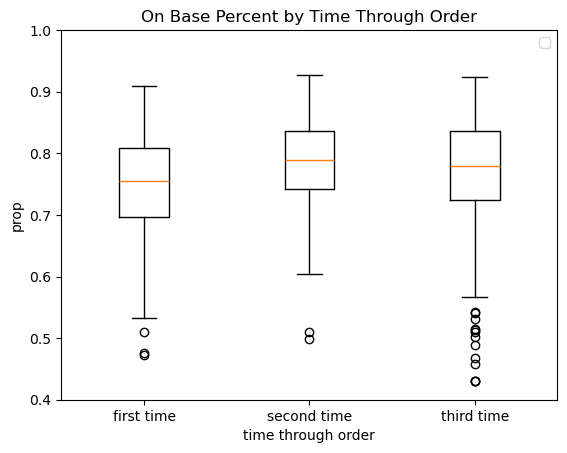

In [310]:
plt.boxplot([first_agg.pmv,second_agg.pmv, third_agg.pmv], labels = ['first time','second time','third time'])
plt.legend()
plt.ylim(0.4,1)
plt.xlabel("time through order")
plt.ylabel("prop")
plt.title("On Base Percent by Time Through Order")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


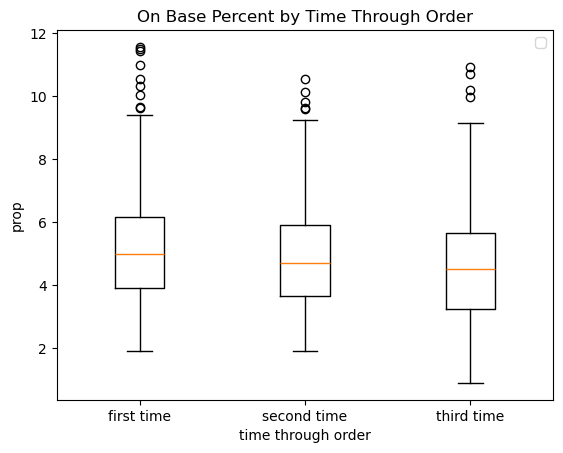

In [311]:
plt.boxplot([first_agg.pitch_variety,second_agg.pitch_variety, third_agg.pitch_variety], labels = ['first time','second time','third time'])
plt.legend()
plt.xlabel("time through order")
plt.ylabel("prop")
plt.title("On Base Percent by Time Through Order")
plt.show()

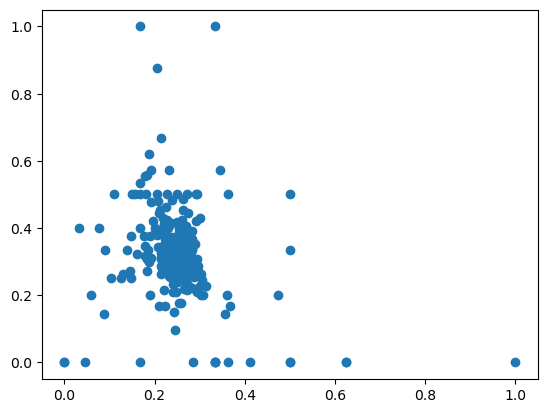

In [312]:
plt.scatter(x = third_agg.is_strike,y = third_agg.obp)
plt.show()

In [313]:
bb.arm_angle.value_counts()

arm_angle
 43.0    2534
 42.6    2530
 42.8    2524
 41.8    2515
 43.2    2502
         ... 
-53.3       1
 78.7       1
-57.3       1
-59.2       1
-69.5       1
Name: count, Length: 1202, dtype: int64

In [249]:
third_agg

,release_pos_x,release_pos_z,pitcher,plate_x,plate_z,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,...,pitcher_fav_pitch,pitch_variety,pmv,obp,avg_rel_speed,weighed_avg_speed,fav_pitch_order,fav_pitch_prop_order,in_zone_perc,strike_perc
0,-1.544139,7.074924,434378.0,0.087885,2.583142,54.540000,0.294627,0.290514,0.339326,1.000000,...,FF,3.320330,0.690579,0.292135,87.625076,87.625076,FF,0.510574,NaN,NaN
1,-2.548677,5.410653,450203.0,0.019083,2.119171,54.309083,0.345518,0.331372,0.285577,0.993590,...,CU,4.714573,0.748830,0.288462,86.452734,86.452734,CU,0.456790,NaN,NaN
2,-3.130920,5.461839,453286.0,0.250115,2.269195,54.178736,0.265158,0.263565,0.258696,1.000000,...,FF,4.599116,0.795735,0.217391,86.302299,86.302299,FF,0.367816,NaN,NaN
3,-2.007736,5.421887,456501.0,0.183396,2.240000,54.755472,0.479583,0.662702,0.680769,1.000000,...,SI,3.476735,0.682474,0.461538,87.713208,87.713208,SI,0.509434,NaN,NaN
4,-3.133424,5.526355,458681.0,-0.016256,2.372709,54.065074,0.371091,0.379691,0.368878,1.000000,...,FF,6.146048,0.826453,0.367347,89.111330,89.111330,FF,0.342365,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.615955,6.083371,800049.0,-0.270674,2.483483,54.511461,0.432400,0.542406,0.545238,1.000000,...,FF,4.894163,0.802870,0.476190,88.149438,88.149438,SL,0.348315,NaN,NaN
300,-2.032857,5.948929,805673.0,0.241250,2.252321,54.025536,0.292133,0.256176,0.338235,1.000000,...,FF,3.609835,0.721751,0.352941,90.030357,90.030357,SL,0.410714,NaN,NaN
301,-1.186115,6.330318,806185.0,0.101083,2.461592,53.989299,0.415944,0.353360,0.329688,1.000000,...,FF,3.217424,0.742409,0.343750,89.297452,89.297452,FF,0.452229,NaN,NaN
302,-1.167426,5.518493,808967.0,-0.029522,2.174154,53.903051,0.315413,0.265816,0.230137,0.986301,...,FF,8.821682,0.816595,0.246575,89.443382,89.443382,FF,0.360294,NaN,NaN


In [315]:
pd.get_dummies(third_agg, columns=['pitcher_fav_pitch','fav_pitch_order'])

,release_pos_x,release_pos_z,pitcher,plate_x,plate_z,release_pos_y,iso_value,arm_angle,age_pit,p_side_adv,...,fav_pitch_order_FC,fav_pitch_order_FF,fav_pitch_order_FO,fav_pitch_order_FS,fav_pitch_order_KC,fav_pitch_order_KN,fav_pitch_order_SI,fav_pitch_order_SL,fav_pitch_order_ST,fav_pitch_order_SV
0,-1.544139,7.074924,434378.0,0.087885,2.583142,54.540000,0.213483,55.007553,41.0,0.489426,...,False,True,False,False,False,False,False,False,False,False
1,-2.548677,5.410653,450203.0,0.019083,2.119171,54.309083,0.102564,20.618166,41.0,0.455026,...,False,False,False,False,False,False,False,False,False,False
2,-3.130920,5.461839,453286.0,0.250115,2.269195,54.178736,0.173913,29.151724,40.0,0.655172,...,False,True,False,False,False,False,False,False,False,False
3,-2.007736,5.421887,456501.0,0.183396,2.240000,54.755472,0.769231,32.366038,38.0,0.433962,...,False,False,False,False,False,False,True,False,False,False
4,-3.133424,5.526355,458681.0,-0.016256,2.372709,54.065074,0.153061,31.739655,37.0,0.445813,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.615955,6.083371,800049.0,-0.270674,2.483483,54.511461,0.428571,50.319101,23.0,0.269663,...,False,False,False,False,False,False,False,True,False,False
300,-2.032857,5.948929,805673.0,0.241250,2.252321,54.025536,0.058824,42.237500,24.0,0.500000,...,False,False,False,False,False,False,False,True,False,False
301,-1.186115,6.330318,806185.0,0.101083,2.461592,53.989299,0.125000,41.447771,23.0,0.222930,...,False,True,False,False,False,False,False,False,False,False
302,-1.167426,5.518493,808967.0,-0.029522,2.174154,53.903051,0.068493,46.641912,26.0,0.500000,...,False,True,False,False,False,False,False,False,False,False


In [259]:
third_agg.columns

Index(['release_pos_x', 'release_pos_z', 'pitcher', 'plate_x', 'plate_z',
       'release_pos_y', 'iso_value', 'arm_angle', 'age_pit', 'p_side_adv',
       'on_base', 'in_box', 'is_strike', 'pitcher_fav_pitch', 'pitch_variety',
       'pmv', 'obp', 'avg_rel_speed', 'weighed_avg_speed', 'fav_pitch_order',
       'fav_pitch_prop_order'],
      dtype='object')

In [258]:
third_agg.avg_rel_speed.mean(),third_agg.weighed_avg_speed.mean()

(87.88758442458459, 87.88759350471405)

In [335]:
diffs = first_agg.select_dtypes(include=['number']) - third_agg.select_dtypes(include=['number'])


In [261]:
diffs

,release_pos_x,release_pos_z,pitcher,plate_x,plate_z,release_pos_y,iso_value,arm_angle,age_pit,p_side_adv,in_box,is_strike,pitch_variety,pmv,obp,avg_rel_speed,weighed_avg_speed,fav_pitch_prop_order
0,-0.007243,0.048431,0.0,0.057246,-0.150527,0.026135,-0.063156,-0.482388,0.0,-0.017387,-0.000437,0.041471,-0.020960,0.016023,0.015055,0.118346,0.118346,-0.017153
1,-0.024469,0.090659,0.0,0.119073,0.011856,0.095337,0.050693,0.504574,0.0,0.010753,-0.018141,0.012215,0.123334,-0.001426,0.029546,1.459339,1.459339,-0.029984
2,0.016228,0.116894,0.0,-0.101622,-0.020771,0.099484,-0.001074,0.123534,0.0,-0.168871,0.049284,0.047276,0.232459,-0.093169,0.041868,1.539824,1.539824,0.163006
3,-0.196981,0.097547,0.0,-0.257358,0.133774,0.087170,-0.713675,0.173585,0.0,0.037736,0.094340,0.018868,2.930901,0.135312,-0.239316,-0.320755,-0.320755,-0.188679
4,-0.044138,0.081661,0.0,0.044881,0.094126,0.046962,0.008555,0.108267,0.0,0.019816,0.077527,0.019701,1.171083,-0.129331,-0.059266,1.199824,1.199824,0.228323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.040774,0.000272,0.0,0.293462,0.029119,0.050695,-0.331349,-0.923190,0.0,0.161564,-0.063155,0.050624,0.112914,-0.068750,-0.087302,2.220079,2.220079,0.086630
300,-0.022330,0.030927,0.0,-0.100299,0.290359,0.051121,0.200436,-0.491993,0.0,-0.093660,-0.010086,0.003036,1.134213,0.030956,-0.007262,0.882323,0.882323,0.038853
301,-0.037901,0.036327,0.0,-0.080138,0.030628,0.012937,0.048611,0.418056,0.0,0.180220,0.047054,0.014514,-0.034764,-0.001996,-0.065972,0.849004,0.849004,0.012338
302,-0.072659,-0.020307,0.0,0.006322,-0.031869,0.034334,0.110278,-1.443197,0.0,0.031429,-0.005735,-0.022290,-1.900876,-0.060629,0.060687,0.500903,0.500903,0.091134


In [ ]:
third_agg

,release_pos_x,release_pos_z,pitcher,plate_x,plate_z,release_pos_y,iso_value,arm_angle,age_pit,p_side_adv,in_box,is_strike,pitcher_fav_pitch,pitch_variety,pmv,obp,avg_rel_speed,weighed_avg_speed,fav_pitch_order,fav_pitch_prop_order
0,-1.544139,7.074924,434378.0,0.087885,2.583142,54.540000,0.213483,55.007553,41.0,0.489426,0.513595,0.244713,FF,3.320330,0.690579,0.292135,87.625076,87.625076,FF,0.510574
1,-2.548677,5.410653,450203.0,0.019083,2.119171,54.309083,0.102564,20.618166,41.0,0.455026,0.486772,0.278660,CU,4.714573,0.748830,0.288462,86.452734,86.452734,CU,0.456790
2,-3.130920,5.461839,453286.0,0.250115,2.269195,54.178736,0.173913,29.151724,40.0,0.655172,0.471264,0.264368,FF,4.599116,0.795735,0.217391,86.302299,86.302299,FF,0.367816
3,-2.007736,5.421887,456501.0,0.183396,2.240000,54.755472,0.769231,32.366038,38.0,0.433962,0.490566,0.226415,SI,3.476735,0.682474,0.461538,87.713208,87.713208,SI,0.509434
4,-3.133424,5.526355,458681.0,-0.016256,2.372709,54.065074,0.153061,31.739655,37.0,0.445813,0.433498,0.224138,FF,6.146048,0.826453,0.367347,89.111330,89.111330,FF,0.342365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.615955,6.083371,800049.0,-0.270674,2.483483,54.511461,0.428571,50.319101,23.0,0.269663,0.494382,0.191011,FF,4.894163,0.802870,0.476190,88.149438,88.149438,SL,0.348315
300,-2.032857,5.948929,805673.0,0.241250,2.252321,54.025536,0.058824,42.237500,24.0,0.500000,0.500000,0.267857,FF,3.609835,0.721751,0.352941,90.030357,90.030357,SL,0.410714
301,-1.186115,6.330318,806185.0,0.101083,2.461592,53.989299,0.125000,41.447771,23.0,0.222930,0.445860,0.254777,FF,3.217424,0.742409,0.343750,89.297452,89.297452,FF,0.452229
302,-1.167426,5.518493,808967.0,-0.029522,2.174154,53.903051,0.068493,46.641912,26.0,0.500000,0.525735,0.305147,FF,8.821682,0.816595,0.246575,89.443382,89.443382,FF,0.360294


In [336]:
diffs = pd.concat([diffs, third_agg.select_dtypes(exclude=['number'])], axis=1)

In [337]:
diffs.drop(columns = ['age_pit','pitcher'], axis = 1, inplace = True)

In [272]:
diffs

,release_pos_x,release_pos_z,pitcher,plate_x,plate_z,release_pos_y,iso_value,arm_angle,p_side_adv,in_box,is_strike,pitch_variety,pmv,obp,avg_rel_speed,weighed_avg_speed,fav_pitch_prop_order
0,-0.007243,0.048431,0.0,0.057246,-0.150527,0.026135,-0.063156,-0.482388,-0.017387,-0.000437,0.041471,-0.020960,0.016023,0.015055,0.118346,0.118346,-0.017153
1,-0.024469,0.090659,0.0,0.119073,0.011856,0.095337,0.050693,0.504574,0.010753,-0.018141,0.012215,0.123334,-0.001426,0.029546,1.459339,1.459339,-0.029984
2,0.016228,0.116894,0.0,-0.101622,-0.020771,0.099484,-0.001074,0.123534,-0.168871,0.049284,0.047276,0.232459,-0.093169,0.041868,1.539824,1.539824,0.163006
3,-0.196981,0.097547,0.0,-0.257358,0.133774,0.087170,-0.713675,0.173585,0.037736,0.094340,0.018868,2.930901,0.135312,-0.239316,-0.320755,-0.320755,-0.188679
4,-0.044138,0.081661,0.0,0.044881,0.094126,0.046962,0.008555,0.108267,0.019816,0.077527,0.019701,1.171083,-0.129331,-0.059266,1.199824,1.199824,0.228323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.040774,0.000272,0.0,0.293462,0.029119,0.050695,-0.331349,-0.923190,0.161564,-0.063155,0.050624,0.112914,-0.068750,-0.087302,2.220079,2.220079,0.086630
300,-0.022330,0.030927,0.0,-0.100299,0.290359,0.051121,0.200436,-0.491993,-0.093660,-0.010086,0.003036,1.134213,0.030956,-0.007262,0.882323,0.882323,0.038853
301,-0.037901,0.036327,0.0,-0.080138,0.030628,0.012937,0.048611,0.418056,0.180220,0.047054,0.014514,-0.034764,-0.001996,-0.065972,0.849004,0.849004,0.012338
302,-0.072659,-0.020307,0.0,0.006322,-0.031869,0.034334,0.110278,-1.443197,0.031429,-0.005735,-0.022290,-1.900876,-0.060629,0.060687,0.500903,0.500903,0.091134


In [338]:
diffs = pd.concat([diffs, third_agg.age_pit], axis=1)

In [339]:
diffs = pd.concat([diffs, third_agg.pitcher], axis=1)
diffs = pd.concat([diffs, third_agg.fav_pitch_order.rename({'fav_pitch_order': '1st_fave_pitch'})], axis = 1)

In [340]:
diffs.set_index('pitcher')

,release_pos_x,release_pos_z,plate_x,plate_z,release_pos_y,iso_value,arm_angle,p_side_adv,in_box,is_strike,pitch_variety,pmv,obp,avg_rel_speed,weighed_avg_speed,fav_pitch_prop_order,pitcher_fav_pitch,fav_pitch_order,age_pit,fav_pitch_order
pitcher,,,,,,,,,,,,,,,,,,,,
434378.0,-0.007243,0.048431,0.057246,-0.150527,0.026135,-0.063156,-0.482388,-0.017387,-0.000437,0.041471,-0.020960,0.016023,0.015055,0.118346,0.118346,-0.017153,FF,FF,41.0,FF
450203.0,-0.024469,0.090659,0.119073,0.011856,0.095337,0.050693,0.504574,0.010753,-0.018141,0.012215,0.123334,-0.001426,0.029546,1.459339,1.459339,-0.029984,CU,CU,41.0,CU
453286.0,0.016228,0.116894,-0.101622,-0.020771,0.099484,-0.001074,0.123534,-0.168871,0.049284,0.047276,0.232459,-0.093169,0.041868,1.539824,1.539824,0.163006,FF,FF,40.0,FF
456501.0,-0.196981,0.097547,-0.257358,0.133774,0.087170,-0.713675,0.173585,0.037736,0.094340,0.018868,2.930901,0.135312,-0.239316,-0.320755,-0.320755,-0.188679,SI,SI,38.0,SI
458681.0,-0.044138,0.081661,0.044881,0.094126,0.046962,0.008555,0.108267,0.019816,0.077527,0.019701,1.171083,-0.129331,-0.059266,1.199824,1.199824,0.228323,FF,FF,37.0,FF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800049.0,-0.040774,0.000272,0.293462,0.029119,0.050695,-0.331349,-0.923190,0.161564,-0.063155,0.050624,0.112914,-0.068750,-0.087302,2.220079,2.220079,0.086630,FF,SL,23.0,SL
805673.0,-0.022330,0.030927,-0.100299,0.290359,0.051121,0.200436,-0.491993,-0.093660,-0.010086,0.003036,1.134213,0.030956,-0.007262,0.882323,0.882323,0.038853,FF,SL,24.0,SL
806185.0,-0.037901,0.036327,-0.080138,0.030628,0.012937,0.048611,0.418056,0.180220,0.047054,0.014514,-0.034764,-0.001996,-0.065972,0.849004,0.849004,0.012338,FF,FF,23.0,FF


In [334]:
diffs

,release_pos_x,release_pos_z,plate_x,plate_z,release_pos_y,iso_value,arm_angle,p_side_adv,in_box,is_strike,...,pitch_variety,pmv,obp,avg_rel_speed,weighed_avg_speed,1st_fave_pitch,fav_pitch_prop_order,pitcher,pitcher,fav_pitch_order
0,-0.007243,0.048431,0.057246,-0.150527,0.026135,-0.063156,-0.482388,-0.017387,-0.000437,0.041471,...,3.320330,0.690579,0.292135,87.625076,87.625076,FF,0.510574,434378.0,434378.0,FF
1,-0.024469,0.090659,0.119073,0.011856,0.095337,0.050693,0.504574,0.010753,-0.018141,0.012215,...,4.714573,0.748830,0.288462,86.452734,86.452734,CU,0.456790,450203.0,450203.0,CU
2,0.016228,0.116894,-0.101622,-0.020771,0.099484,-0.001074,0.123534,-0.168871,0.049284,0.047276,...,4.599116,0.795735,0.217391,86.302299,86.302299,FF,0.367816,453286.0,453286.0,FF
3,-0.196981,0.097547,-0.257358,0.133774,0.087170,-0.713675,0.173585,0.037736,0.094340,0.018868,...,3.476735,0.682474,0.461538,87.713208,87.713208,SI,0.509434,456501.0,456501.0,SI
4,-0.044138,0.081661,0.044881,0.094126,0.046962,0.008555,0.108267,0.019816,0.077527,0.019701,...,6.146048,0.826453,0.367347,89.111330,89.111330,FF,0.342365,458681.0,458681.0,FF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.040774,0.000272,0.293462,0.029119,0.050695,-0.331349,-0.923190,0.161564,-0.063155,0.050624,...,4.894163,0.802870,0.476190,88.149438,88.149438,SL,0.348315,800049.0,800049.0,SL
300,-0.022330,0.030927,-0.100299,0.290359,0.051121,0.200436,-0.491993,-0.093660,-0.010086,0.003036,...,3.609835,0.721751,0.352941,90.030357,90.030357,SL,0.410714,805673.0,805673.0,SL
301,-0.037901,0.036327,-0.080138,0.030628,0.012937,0.048611,0.418056,0.180220,0.047054,0.014514,...,3.217424,0.742409,0.343750,89.297452,89.297452,FF,0.452229,806185.0,806185.0,FF
302,-0.072659,-0.020307,0.006322,-0.031869,0.034334,0.110278,-1.443197,0.031429,-0.005735,-0.022290,...,8.821682,0.816595,0.246575,89.443382,89.443382,FF,0.360294,808967.0,808967.0,FF


In [329]:
diffs.pitcher_fav_pitch.value_counts()

pitcher_fav_pitch
FF    197
SI     50
SL     17
FC     17
CH     10
ST      5
CU      4
FS      2
KC      1
KN      1
Name: count, dtype: int64